In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


AxesSubplot(0.125,0.2;0.775x0.68)


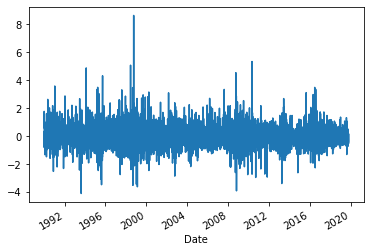

In [4]:
returns = yen_futures['Settle'].pct_change()*100
print(returns.plot())

In [5]:
yen_futures['Returns']=returns.copy()
print(yen_futures.dropna())

              Open    High     Low    Last  Change  Settle    Volume  \
Date                                                                   
2014-02-18  9831.0  9865.0  9734.0  9775.0    42.0  9775.0  203495.0   
2014-02-19  9768.0  9825.0  9760.0  9773.0     2.0  9773.0  129508.0   
2014-02-20  9774.0  9837.0  9765.0  9775.0     2.0  9775.0  160202.0   
2014-02-21  9772.0  9776.0  9725.0  9758.0    20.0  9755.0  103091.0   
2014-02-24  9752.0  9789.0  9740.0  9757.0     2.0  9757.0   90654.0   
...            ...     ...     ...     ...     ...     ...       ...   
2019-10-09  9381.0  9391.5  9330.5  9343.5    38.5  9338.0   99153.0   
2019-10-10  9343.5  9380.5  9293.5  9301.0    34.5  9303.5  159397.0   
2019-10-11  9308.5  9309.0  9240.0  9267.0    52.5  9251.0  158810.0   
2019-10-14  9259.0  9292.0  9250.5  9261.0    14.0  9265.0   69457.0   
2019-10-15  9264.5  9280.0  9216.5  9220.0    43.5  9221.5  108342.0   

            Previous Day Open Interest   Returns  
Date        

In [6]:
yen_futures['Lagged_Return']=returns.shift()
print(yen_futures.head())

              Open    High     Low    Last  Change  Settle   Volume  \
Date                                                                  
1990-01-02  6954.0  6954.0  6835.0  6847.0     NaN  6847.0  48336.0   
1990-01-03  6877.0  6910.0  6865.0  6887.0     NaN  6887.0  38206.0   
1990-01-04  6937.0  7030.0  6924.0  7008.0     NaN  7008.0  49649.0   
1990-01-05  6952.0  6985.0  6942.0  6950.0     NaN  6950.0  29944.0   
1990-01-08  6936.0  6972.0  6936.0  6959.0     NaN  6959.0  19763.0   

            Previous Day Open Interest   Returns  Lagged_Return  
Date                                                             
1990-01-02                     51473.0       NaN            NaN  
1990-01-03                     53860.0  0.584197            NaN  
1990-01-04                     55699.0  1.756933       0.584197  
1990-01-05                     53111.0 -0.827626       1.756933  
1990-01-08                     52072.0  0.129496      -0.827626  


In [7]:
yen_futures=yen_futures.dropna()
print(yen_futures.tail())

              Open    High     Low    Last  Change  Settle    Volume  \
Date                                                                   
2019-10-09  9381.0  9391.5  9330.5  9343.5    38.5  9338.0   99153.0   
2019-10-10  9343.5  9380.5  9293.5  9301.0    34.5  9303.5  159397.0   
2019-10-11  9308.5  9309.0  9240.0  9267.0    52.5  9251.0  158810.0   
2019-10-14  9259.0  9292.0  9250.5  9261.0    14.0  9265.0   69457.0   
2019-10-15  9264.5  9280.0  9216.5  9220.0    43.5  9221.5  108342.0   

            Previous Day Open Interest   Returns  Lagged_Return  
Date                                                             
2019-10-09                    145470.0 -0.410601       0.170931  
2019-10-10                    144474.0 -0.369458      -0.410601  
2019-10-11                    147471.0 -0.564304      -0.369458  
2019-10-14                    153902.0  0.151335      -0.564304  
2019-10-15                    151564.0 -0.469509       0.151335  


In [8]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]
#print(train)
#print(test)

In [9]:
x_train=train['Lagged_Return'].to_frame().dropna()
print(x_train)

            Lagged_Return
Date                     
2014-02-18       0.409123
2014-02-19      -0.427829
2014-02-20      -0.020460
2014-02-21       0.020465
2014-02-24      -0.204604
...                   ...
2017-12-22       0.084621
2017-12-26       0.118370
2017-12-27       0.118230
2017-12-28      -0.151830
2017-12-29       0.180221

[967 rows x 1 columns]


In [10]:
x_test=test['Lagged_Return'].to_frame()
print(x_test)

            Lagged_Return
Date                     
2018-01-02       0.224871
2018-01-03       0.297285
2018-01-04      -0.240479
2018-01-05      -0.213028
2018-01-08      -0.353933
...                   ...
2019-10-09       0.170931
2019-10-10      -0.410601
2019-10-11      -0.369458
2019-10-14      -0.564304
2019-10-15       0.151335

[448 rows x 1 columns]


In [11]:
y_train=train['Returns']
print(y_train)

Date
2014-02-18   -0.427829
2014-02-19   -0.020460
2014-02-20    0.020465
2014-02-21   -0.204604
2014-02-24    0.020502
                ...   
2017-12-22    0.118370
2017-12-26    0.118230
2017-12-27   -0.151830
2017-12-28    0.180221
2017-12-29    0.224871
Name: Returns, Length: 967, dtype: float64


In [12]:
y_test=test['Returns']
print(y_test)

Date
2018-01-02    0.297285
2018-01-03   -0.240479
2018-01-04   -0.213028
2018-01-05   -0.353933
2018-01-08    0.062017
                ...   
2019-10-09   -0.410601
2019-10-10   -0.369458
2019-10-11   -0.564304
2019-10-14    0.151335
2019-10-15   -0.469509
Name: Returns, Length: 448, dtype: float64


In [13]:
from sklearn.linear_model import LinearRegression

#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(x_test)

In [15]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results = y_test.to_frame()
results["Predicted Return"] = predictions

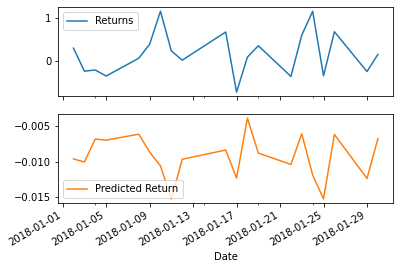

In [16]:
results_plot = results[:20].plot(subplots=True)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results["Returns"],
    results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.41545437184712763


In [18]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()
print(in_sample_results)

             Returns
Date                
2014-02-18 -0.427829
2014-02-19 -0.020460
2014-02-20  0.020465
2014-02-21 -0.204604
2014-02-24  0.020502
...              ...
2017-12-22  0.118370
2017-12-26  0.118230
2017-12-27 -0.151830
2017-12-28  0.180221
2017-12-29  0.224871

[967 rows x 1 columns]


In [19]:
# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(x_train)
print(in_sample_results)

             Returns  In-sample Predictions
Date                                       
2014-02-18 -0.427829              -0.010704
2014-02-19 -0.020460              -0.005682
2014-02-20  0.020465              -0.008127
2014-02-21 -0.204604              -0.008372
2014-02-24  0.020502              -0.007022
...              ...                    ...
2017-12-22  0.118370              -0.008757
2017-12-26  0.118230              -0.008960
2017-12-27 -0.151830              -0.008959
2017-12-28  0.180221              -0.007338
2017-12-29  0.224871              -0.009331

[967 rows x 2 columns]


In [20]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Returns"],
    in_sample_results["In-sample Predictions"]
)

In [21]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.5962037920929946
